In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

la dimensions de X est: (2, 100)
la dimension de y est: (1, 100)


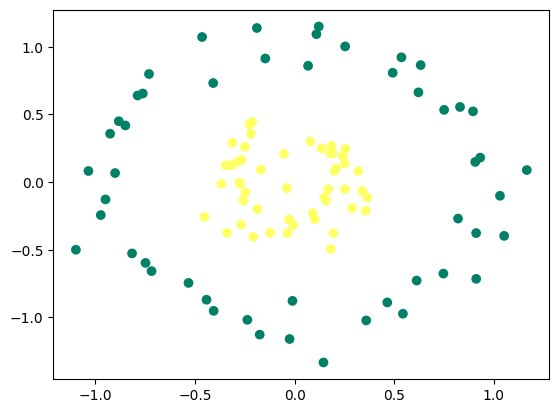

In [21]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
X = X.T #transposer les vecteurs avant de commencer
y =y.reshape(1,y.shape[0])
print('la dimensions de X est:',X.shape)
print('la dimension de y est:',y.shape)

plt.scatter(X[0,:],X[1,:],c=y, cmap='summer')
plt.show()

In [22]:
def initialisation(n0,n1,n2):
    w1 = np.random.randn(n1,n0)
    b1= np.random.randn(n1,1)
    w2 = np.random.randn(n2,n1)
    b2= np.random.randn(n2,1)
    
    parametres ={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
        
    }
    return parametres

In [23]:
def forward_propagation(x,parametres):
    w1 = parametres['w1']
    b1 = parametres['b1']
    w2 = parametres['w2']
    b2 = parametres['b2']
    
    z1 = w1.dot(x) + b1
    A1 = 1/(1+np.exp(-z1))
    z2 = w2.dot(A1) + b2
    A2 = 1/(1+np.exp(-z2))
    
    activations ={
        'A1':A1,
        'A2':A2
    }
    
    return activations
    

In [24]:
def back_propagation(X,y,activations,parametres):
    A1 = activations['A1']
    A2 = activations['A2']
    w2 = parametres['w2']
    
    m =y.shape[1]
    dz2 = A2-y
    dw2 = 1/m * dz2.dot(A1.T)
    db2 = 1/m * np.sum(dz2,axis=1,keepdims=True)
    
    dz1 = np.dot(w2.T,dz2)*A1*(1-A1) 
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1,axis=1,keepdims=True)
    gradients={
        'dw1':dw1,
        'db1':db1,
        'dw2':dw2,
        'db2':db2
    }
    
    return gradients

In [25]:
def update(gradients,parametres,learning_rate):
    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    w1 =parametres['w1']
    b1 =parametres['b1']
    w2 =parametres['w2']
    b2 =parametres['b2']
    
    w1= w1- learning_rate*dw1
    b1= b1- learning_rate*db1
    w2= w2- learning_rate*dw2
    b2= b2- learning_rate*db2
    
    parametres ={
        'w1':w1,
        'b1':b1,
        'w2':w2,
        'b2':b2
    }
    
    return parametres

In [26]:
def predict(X,parametres):
    activations =forward_propagation(X,parametres)
    A2 =activations['A2']
    
    return A2 >=0.5

In [19]:
# def log_loss(y,activations):
#     m =y.shape[1]
#     A2 =activations['A2']   
#     return  1/m*np.sum(-y*np.log(A2)-(1-y)*np.log(1-A2))

In [27]:
def neural_network(X_train,y_train,n1,learning_rate=0.1, n_iter=100):
    #initialisation
    n0 =X_train.shape[0]
    n2 = y_train.shape[0]
    parametres = initialisation(n0,n1,n2)
    train_loss=[]
    train_acc =[]
    
    for i in range(n_iter):
        activations = forward_propagation(X_train,parametres)
        gradients = back_propagation(X_train,y_train,activations,parametres)
        parametres = update(gradients,parametres,learning_rate)
        
        if i%10==0:
            train_loss.append(log_loss(y_train,activations['A2']))
            y_pred =predict(X_train,parametres)
            current_accuracy = accuracy_score(y_train.flatten(),y_pred.flatten())
            train_acc.append(current_accuracy)
            
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label='train_loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(train_acc,label='train_acc')
    plt.legend()
    plt.show()
    return parametres

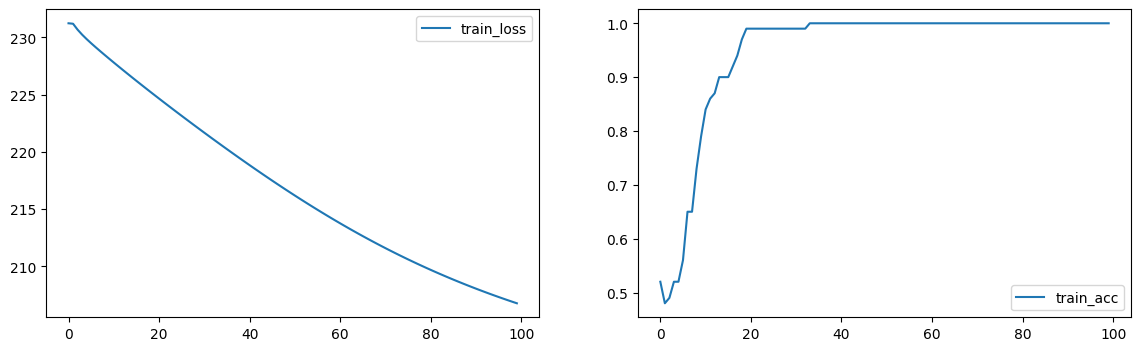

In [36]:
parametres = neural_network(X,y,n1=64,n_iter=1000,learning_rate=0.1)